In [1]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem

from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('/home/sudarshan/Documents/data_sets/LPOCT/LPOCT_all.dat', sep=';')

In [4]:
usecols = [' SMILES', ' Exp logD']

In [5]:
data = pd.DataFrame(data)

In [6]:
data = data[usecols]

In [7]:
data.rename(columns={' SMILES': 'SMILES', ' Exp logD' : 'logP'}, inplace=True)

In [8]:
m = Chem.MolFromSmiles('CCCCO')

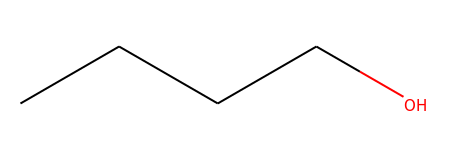

In [9]:
m

In [10]:
new_f = np.empty((data.shape[0], 13))
for i, x in enumerate(data['SMILES'].values):
    m = Chem.MolFromSmiles(x)
    new_f[i, 0] = m.GetNumHeavyAtoms()
    new_f[i, 1] = AllChem.CalcNumRotatableBonds(m)
    new_f[i, 2] = len(m.GetSubstructMatches(Chem.MolFromSmarts('[#7]'))) #nitrogens
    new_f[i, 3] = len(m.GetSubstructMatches(Chem.MolFromSmarts('[#8]'))) #oxygens
    new_f[i, 4] = len(m.GetSubstructMatches(Chem.MolFromSmarts('[#9]'))) #Fluorines
    new_f[i, 5] = len(m.GetSubstructMatches(Chem.MolFromSmarts('[#15]'))) #Phosphorous
    new_f[i, 6] = len(m.GetSubstructMatches(Chem.MolFromSmarts('[#16]'))) #Sulfurs
    new_f[i, 7] = len(m.GetSubstructMatches(Chem.MolFromSmarts('[#17]'))) #Chlorines
    new_f[i, 8] = len(m.GetSubstructMatches(Chem.MolFromSmarts('[#35]'))) #Bromines
    new_f[i, 9] = len(m.GetSubstructMatches(Chem.MolFromSmarts('[#53]'))) #Iodines
    new_f[i, 10] = AllChem.CalcNumAromaticRings(m)
    new_f[i, 11] = AllChem.CalcNumHBA(m)
    new_f[i, 12] = AllChem.CalcNumHBD(m)

In [11]:
new_f2 = pd.DataFrame({"NHA":new_f[:, 0], "NRB":new_f[:, 1], 'NN':new_f[:, 2], 'NO':new_f[:, 3], 'NF':new_f[:, 4], 'NP':new_f[:, 5], 'NS':new_f[:, 6], 'NCl':new_f[:, 7], 'NBr':new_f[:, 8], 'NI':new_f[:, 9], 'NAR':new_f[:, 10],
                      'NHBA':new_f[:, 11], 'NHBD':new_f[:, 12]})

In [12]:
new_f2.head()

,NHA,NRB,NN,NO,NF,NP,NS,NCl,NBr,NI,NAR,NHBA,NHBD
0,5.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,6.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,5.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [13]:
data_new = pd.concat([data, new_f2], axis=1)

In [14]:
data_new.head()

,SMILES,logP,NHA,NRB,NN,NO,NF,NP,NS,NCl,NBr,NI,NAR,NHBA,NHBD
0,CCCCO,0.88,5.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,CCC(=O)OC,0.82,6.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
2,CCI,2.00,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,CCOCC,0.89,5.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,CC(C)Cl,1.90,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [15]:
col_for_X = ['NHA', 'NRB', 'NN', 'NO', 'NF', 'NP', 'NS', 'NCl', 'NBr', 'NI', 'NAR', 'NHBA', 'NHBD']
col_for_y = ['logP']

In [16]:
X = data_new[col_for_X]
y = data_new[col_for_y]

In [17]:
X.shape

(693, 13)

In [19]:
%matplotlib notebook
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [47]:
linsvr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1).fit(X_train, y_train)

/home/sudarshan/softwares/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
print('R-squared score (Training):', linsvr.score(X_train, y_train))
print('R-squared score (Test):', linsvr.score(X_test, y_test))

R-squared score (Training): 0.9825985437810231
R-squared score (Test): 0.9396705787620762


In [53]:
score = np.empty((6, 3))
k = 0
for alpha in [1, 10, 100, 200, 500, 1000]:
    linsvr = SVR(kernel='rbf', C=alpha, gamma=0.1, epsilon=0.1).fit(X_train, y_train)    
    score[k, 0] = alpha
    score[k, 1] = linsvr.score(X_train, y_train)
    score[k, 2] = linsvr.score(X_test, y_test)
    k += 1

/home/sudarshan/softwares/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sudarshan/softwares/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sudarshan/softwares/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/sudarshan/softwares/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was 

In [54]:
score

array([[1.00000000e+00, 9.18658883e-01, 8.73094390e-01],
       [1.00000000e+01, 9.73558679e-01, 9.37924335e-01],
       [1.00000000e+02, 9.82598544e-01, 9.39670579e-01],
       [2.00000000e+02, 9.83608091e-01, 9.30941485e-01],
       [5.00000000e+02, 9.84123719e-01, 9.25801409e-01],
       [1.00000000e+03, 9.84714168e-01, 9.26256102e-01]])

<IPython.core.display.Javascript object>


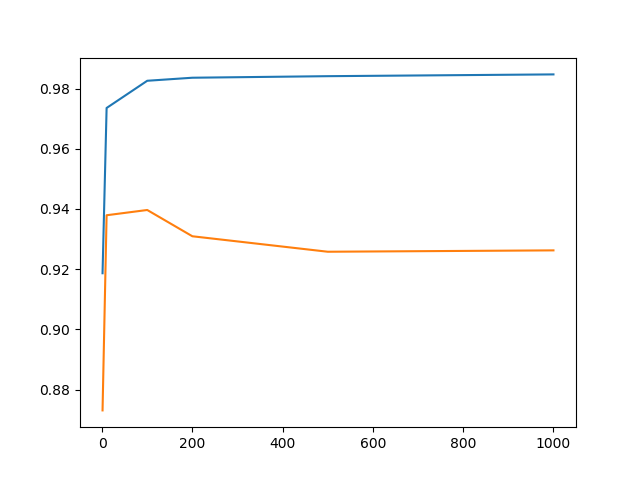

In [55]:
plt.plot(score[:, 0], score[:, 1])
plt.plot(score[:, 0], score[:, 2])

In [56]:
linsvr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1).fit(X_train, y_train)

/home/sudarshan/softwares/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<IPython.core.display.Javascript object>


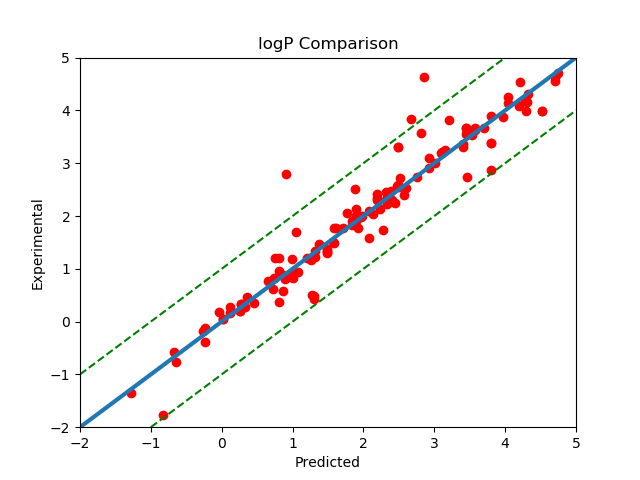

In [57]:
plt.plot(linsvr.predict(X_test), y_test, 'ro')
plt.xlim(-2.0, 5.0)
plt.ylim(-2.0, 5.0)
plt.xlabel('Predicted')
plt.ylabel('Experimental')
plt.title("logP Comparison")
#plt.legend()

#A straight line
x = np.linspace(-2, 5, 28)
y = np.copy(x)
x2 = np.linspace(-1, 5, 24)
y2 = x2-1
x3 = np.linspace(-2, 4, 24)
y3 = x3+1
plt.plot(x, y, linewidth=3)
plt.plot(x2, y2, linestyle='dashed', color='green')
plt.plot(x3, y3, linestyle='dashed', color='green')